# Prepare Docking Files with IC50 and Class Info + Visualization

This notebook:
- Loads `LDHA_inhibitors_with_IC50.csv`
- Generates 3D ligand structures (`.mol`, `.pdb`) with IC50 & class info in filenames
- Prepares docking results placeholder
- Visualizes IC50 distribution and class balance

In [3]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, rdmolfiles
import os
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load Dataset

In [10]:
try:
    df = pd.read_csv('LDHA_inhibitors_deduplicated.csv')
    df = df.dropna(subset=['Ligand SMILES'])
    print(f"Loaded {len(df)} compounds.")
except FileNotFoundError:
    raise FileNotFoundError("CSV file not found. Please place 'LDHA_inhibitors_deduplicated.csv' in the data folder.")

Loaded 1351 compounds.


## 2. Visualize IC50 Distribution and Class Balance

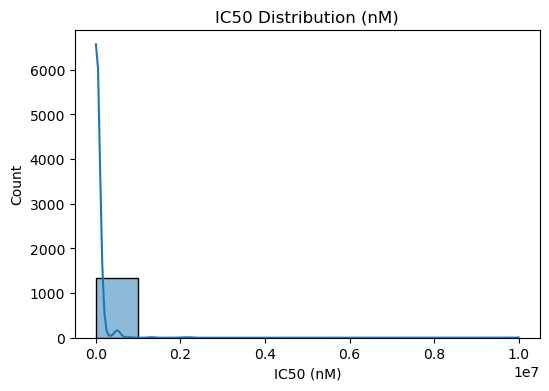

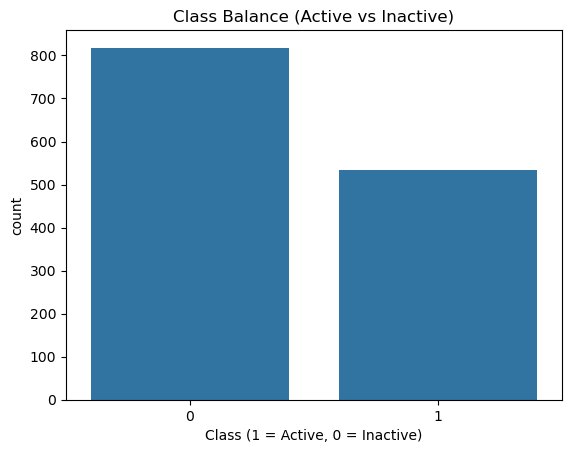

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df['IC50 (nM)'], bins=10, kde=True)
plt.title('IC50 Distribution (nM)')
plt.xlabel('IC50 (nM)')
plt.show()

sns.countplot(x='class', data=df)
plt.title('Class Balance (Active vs Inactive)')
plt.xlabel('Class (1 = Active, 0 = Inactive)')
plt.show()

## 3. Prepare Output Folder

In [16]:
output_dir = 'docking/ligands'
os.makedirs(output_dir, exist_ok=True)
print(f'Ligand files will be saved to: {output_dir}')

Ligand files will be saved to: docking/ligands


## 4. Generate 3D Structures & Save Files (with IC50 & Class in Filenames)

In [18]:
for idx, row in df.iterrows():
    cmpd_id = f'CMPD_{idx:03d}'
    smiles = row['Ligand SMILES']
    ic50 = row['IC50 (nM)']
    activity_class = row['class']

    filename_base = f'{cmpd_id}_IC50-{ic50:.1f}_class-{activity_class}'

    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            print(f'SKIP: Invalid SMILES for {cmpd_id}')
            continue
        mol = Chem.AddHs(mol)
        res = AllChem.EmbedMolecule(mol, AllChem.ETKDG())
        if res != 0:
            print(f'WARNING: Embedding may have failed for {cmpd_id}')
        AllChem.UFFOptimizeMolecule(mol)

        # Save MOL file
        mol_path = os.path.join(output_dir, f'{filename_base}.mol')
        rdmolfiles.MolToMolFile(mol, mol_path)

        # Save PDB file
        pdb_path = os.path.join(output_dir, f'{filename_base}.pdb')
        rdmolfiles.MolToPDBFile(mol, pdb_path)

        print(f'Saved: {filename_base}.mol and {filename_base}.pdb')
    except Exception as e:
        print(f'Error processing {cmpd_id}: {e}')

Saved: CMPD_000_IC50-500.0_class-1.mol and CMPD_000_IC50-500.0_class-1.pdb
Saved: CMPD_001_IC50-1600.0_class-0.mol and CMPD_001_IC50-1600.0_class-0.pdb
Saved: CMPD_002_IC50-2000.0_class-0.mol and CMPD_002_IC50-2000.0_class-0.pdb
Saved: CMPD_003_IC50-456.0_class-1.mol and CMPD_003_IC50-456.0_class-1.pdb
Saved: CMPD_004_IC50-215.8_class-1.mol and CMPD_004_IC50-215.8_class-1.pdb
Saved: CMPD_005_IC50-530.5_class-1.mol and CMPD_005_IC50-530.5_class-1.pdb
Saved: CMPD_006_IC50-500000.0_class-0.mol and CMPD_006_IC50-500000.0_class-0.pdb
Saved: CMPD_007_IC50-271.2_class-1.mol and CMPD_007_IC50-271.2_class-1.pdb
Saved: CMPD_008_IC50-271.2_class-1.mol and CMPD_008_IC50-271.2_class-1.pdb
Saved: CMPD_009_IC50-349.2_class-1.mol and CMPD_009_IC50-349.2_class-1.pdb
Saved: CMPD_010_IC50-349.2_class-1.mol and CMPD_010_IC50-349.2_class-1.pdb
Saved: CMPD_011_IC50-40000.0_class-0.mol and CMPD_011_IC50-40000.0_class-0.pdb
Saved: CMPD_012_IC50-100.0_class-1.mol and CMPD_012_IC50-100.0_class-1.pdb
Saved: CMPD

[11:14:32] UFFTYPER: Unrecognized charge state for atom: 33
[11:14:32] UFFTYPER: Unrecognized charge state for atom: 33


Saved: CMPD_042_IC50-550.0_class-1.mol and CMPD_042_IC50-550.0_class-1.pdb
Saved: CMPD_043_IC50-3087.8_class-1.mol and CMPD_043_IC50-3087.8_class-1.pdb


[11:14:32] UFFTYPER: Unrecognized charge state for atom: 35
[11:14:32] UFFTYPER: Unrecognized charge state for atom: 35


Saved: CMPD_044_IC50-550.0_class-1.mol and CMPD_044_IC50-550.0_class-1.pdb
Saved: CMPD_045_IC50-550.0_class-1.mol and CMPD_045_IC50-550.0_class-1.pdb
Saved: CMPD_046_IC50-711.2_class-1.mol and CMPD_046_IC50-711.2_class-1.pdb
Saved: CMPD_047_IC50-711.2_class-1.mol and CMPD_047_IC50-711.2_class-1.pdb
Saved: CMPD_048_IC50-100000.0_class-0.mol and CMPD_048_IC50-100000.0_class-0.pdb
Saved: CMPD_049_IC50-100000.0_class-0.mol and CMPD_049_IC50-100000.0_class-0.pdb
Saved: CMPD_050_IC50-228.5_class-1.mol and CMPD_050_IC50-228.5_class-1.pdb
Saved: CMPD_051_IC50-228.5_class-1.mol and CMPD_051_IC50-228.5_class-1.pdb
Saved: CMPD_052_IC50-75000.0_class-0.mol and CMPD_052_IC50-75000.0_class-0.pdb
Saved: CMPD_053_IC50-27300.0_class-0.mol and CMPD_053_IC50-27300.0_class-0.pdb
Saved: CMPD_054_IC50-41400.0_class-0.mol and CMPD_054_IC50-41400.0_class-0.pdb
Saved: CMPD_055_IC50-40000.0_class-0.mol and CMPD_055_IC50-40000.0_class-0.pdb
Saved: CMPD_056_IC50-10400.0_class-0.mol and CMPD_056_IC50-10400.0_class

[11:21:23] UFFTYPER: Unrecognized charge state for atom: 34
[11:21:24] UFFTYPER: Unrecognized charge state for atom: 34


Saved: CMPD_072_IC50-550.0_class-1.mol and CMPD_072_IC50-550.0_class-1.pdb
Saved: CMPD_073_IC50-12068.5_class-0.mol and CMPD_073_IC50-12068.5_class-0.pdb
Saved: CMPD_074_IC50-12068.5_class-0.mol and CMPD_074_IC50-12068.5_class-0.pdb
Saved: CMPD_075_IC50-120.0_class-1.mol and CMPD_075_IC50-120.0_class-1.pdb
Saved: CMPD_076_IC50-120.0_class-1.mol and CMPD_076_IC50-120.0_class-1.pdb
Saved: CMPD_077_IC50-15.0_class-1.mol and CMPD_077_IC50-15.0_class-1.pdb
Saved: CMPD_078_IC50-30.0_class-1.mol and CMPD_078_IC50-30.0_class-1.pdb
Saved: CMPD_079_IC50-90.0_class-1.mol and CMPD_079_IC50-90.0_class-1.pdb
Saved: CMPD_080_IC50-15.0_class-1.mol and CMPD_080_IC50-15.0_class-1.pdb
Saved: CMPD_081_IC50-30.0_class-1.mol and CMPD_081_IC50-30.0_class-1.pdb
Saved: CMPD_082_IC50-90.0_class-1.mol and CMPD_082_IC50-90.0_class-1.pdb
Saved: CMPD_083_IC50-100000.0_class-0.mol and CMPD_083_IC50-100000.0_class-0.pdb
Saved: CMPD_084_IC50-550.0_class-1.mol and CMPD_084_IC50-550.0_class-1.pdb
Saved: CMPD_085_IC50-57

[11:21:24] UFFTYPER: Unrecognized charge state for atom: 25
[11:21:25] UFFTYPER: Unrecognized charge state for atom: 25
[11:21:25] UFFTYPER: Unrecognized charge state for atom: 33
[11:21:25] UFFTYPER: Unrecognized charge state for atom: 33


Saved: CMPD_089_IC50-29000.0_class-0.mol and CMPD_089_IC50-29000.0_class-0.pdb
Saved: CMPD_090_IC50-550.0_class-1.mol and CMPD_090_IC50-550.0_class-1.pdb


[11:21:25] UFFTYPER: Unrecognized charge state for atom: 33
[11:21:25] UFFTYPER: Unrecognized charge state for atom: 33


Saved: CMPD_091_IC50-550.0_class-1.mol and CMPD_091_IC50-550.0_class-1.pdb
Saved: CMPD_092_IC50-550.0_class-1.mol and CMPD_092_IC50-550.0_class-1.pdb
Saved: CMPD_093_IC50-2000.0_class-0.mol and CMPD_093_IC50-2000.0_class-0.pdb
Saved: CMPD_094_IC50-550.0_class-1.mol and CMPD_094_IC50-550.0_class-1.pdb
Saved: CMPD_095_IC50-265.8_class-1.mol and CMPD_095_IC50-265.8_class-1.pdb


[11:21:25] UFFTYPER: Unrecognized charge state for atom: 33
[11:21:25] UFFTYPER: Unrecognized charge state for atom: 33
[11:21:25] UFFTYPER: Unrecognized charge state for atom: 15


Saved: CMPD_096_IC50-550.0_class-1.mol and CMPD_096_IC50-550.0_class-1.pdb
Saved: CMPD_097_IC50-29000.0_class-0.mol and CMPD_097_IC50-29000.0_class-0.pdb
Saved: CMPD_098_IC50-550.0_class-1.mol and CMPD_098_IC50-550.0_class-1.pdb


[11:21:25] UFFTYPER: Unrecognized charge state for atom: 15


Saved: CMPD_099_IC50-440.8_class-1.mol and CMPD_099_IC50-440.8_class-1.pdb
Saved: CMPD_100_IC50-440.8_class-1.mol and CMPD_100_IC50-440.8_class-1.pdb
Saved: CMPD_101_IC50-750.0_class-1.mol and CMPD_101_IC50-750.0_class-1.pdb
Saved: CMPD_102_IC50-750.0_class-1.mol and CMPD_102_IC50-750.0_class-1.pdb
Saved: CMPD_103_IC50-710.0_class-1.mol and CMPD_103_IC50-710.0_class-1.pdb
Saved: CMPD_104_IC50-710.0_class-1.mol and CMPD_104_IC50-710.0_class-1.pdb
Saved: CMPD_105_IC50-480.0_class-1.mol and CMPD_105_IC50-480.0_class-1.pdb
Saved: CMPD_106_IC50-480.0_class-1.mol and CMPD_106_IC50-480.0_class-1.pdb
Saved: CMPD_107_IC50-100000.0_class-0.mol and CMPD_107_IC50-100000.0_class-0.pdb
Saved: CMPD_108_IC50-12500.0_class-0.mol and CMPD_108_IC50-12500.0_class-0.pdb
Saved: CMPD_109_IC50-12500.0_class-0.mol and CMPD_109_IC50-12500.0_class-0.pdb
Saved: CMPD_110_IC50-2557.5_class-0.mol and CMPD_110_IC50-2557.5_class-0.pdb
Saved: CMPD_111_IC50-2557.5_class-0.mol and CMPD_111_IC50-2557.5_class-0.pdb
Saved: 

[11:21:28] UFFTYPER: Unrecognized charge state for atom: 22
[11:21:28] UFFTYPER: Unrecognized charge state for atom: 22


Saved: CMPD_150_IC50-29000.0_class-0.mol and CMPD_150_IC50-29000.0_class-0.pdb
Saved: CMPD_151_IC50-57000.0_class-0.mol and CMPD_151_IC50-57000.0_class-0.pdb
Saved: CMPD_152_IC50-29000.0_class-0.mol and CMPD_152_IC50-29000.0_class-0.pdb


[11:21:29] UFFTYPER: Unrecognized charge state for atom: 22
[11:21:29] UFFTYPER: Unrecognized charge state for atom: 22
[11:21:29] UFFTYPER: Unrecognized charge state for atom: 22
[11:21:29] UFFTYPER: Unrecognized charge state for atom: 22
[11:21:29] UFFTYPER: Unrecognized charge state for atom: 22


Saved: CMPD_153_IC50-29000.0_class-0.mol and CMPD_153_IC50-29000.0_class-0.pdb
Saved: CMPD_154_IC50-29000.0_class-0.mol and CMPD_154_IC50-29000.0_class-0.pdb
Saved: CMPD_155_IC50-29000.0_class-0.mol and CMPD_155_IC50-29000.0_class-0.pdb


[11:21:29] UFFTYPER: Unrecognized charge state for atom: 22
[11:21:29] UFFTYPER: Unrecognized charge state for atom: 22
[11:21:29] UFFTYPER: Unrecognized charge state for atom: 22
[11:21:29] UFFTYPER: Unrecognized charge state for atom: 22
[11:21:29] UFFTYPER: Unrecognized charge state for atom: 22
[11:21:29] UFFTYPER: Unrecognized charge state for atom: 22


Saved: CMPD_156_IC50-29000.0_class-0.mol and CMPD_156_IC50-29000.0_class-0.pdb
Saved: CMPD_157_IC50-29000.0_class-0.mol and CMPD_157_IC50-29000.0_class-0.pdb
Saved: CMPD_158_IC50-29000.0_class-0.mol and CMPD_158_IC50-29000.0_class-0.pdb


[11:21:29] UFFTYPER: Unrecognized charge state for atom: 22
[11:21:29] UFFTYPER: Unrecognized charge state for atom: 22
[11:21:29] UFFTYPER: Unrecognized charge state for atom: 22
[11:21:29] UFFTYPER: Unrecognized charge state for atom: 22
[11:21:29] UFFTYPER: Unrecognized charge state for atom: 22


Saved: CMPD_159_IC50-29000.0_class-0.mol and CMPD_159_IC50-29000.0_class-0.pdb
Saved: CMPD_160_IC50-29000.0_class-0.mol and CMPD_160_IC50-29000.0_class-0.pdb
Saved: CMPD_161_IC50-29000.0_class-0.mol and CMPD_161_IC50-29000.0_class-0.pdb


[11:21:29] UFFTYPER: Unrecognized charge state for atom: 22
[11:21:29] UFFTYPER: Unrecognized charge state for atom: 22


Saved: CMPD_162_IC50-29000.0_class-0.mol and CMPD_162_IC50-29000.0_class-0.pdb
Saved: CMPD_163_IC50-29000.0_class-0.mol and CMPD_163_IC50-29000.0_class-0.pdb
Saved: CMPD_164_IC50-29000.0_class-0.mol and CMPD_164_IC50-29000.0_class-0.pdb
Saved: CMPD_165_IC50-29000.0_class-0.mol and CMPD_165_IC50-29000.0_class-0.pdb
Saved: CMPD_166_IC50-29000.0_class-0.mol and CMPD_166_IC50-29000.0_class-0.pdb
Saved: CMPD_167_IC50-29000.0_class-0.mol and CMPD_167_IC50-29000.0_class-0.pdb


[11:21:30] UFFTYPER: Unrecognized charge state for atom: 21
[11:21:30] UFFTYPER: Unrecognized charge state for atom: 21
[11:21:30] UFFTYPER: Unrecognized charge state for atom: 21
[11:21:30] UFFTYPER: Unrecognized charge state for atom: 21


Saved: CMPD_168_IC50-29000.0_class-0.mol and CMPD_168_IC50-29000.0_class-0.pdb
Saved: CMPD_169_IC50-29000.0_class-0.mol and CMPD_169_IC50-29000.0_class-0.pdb
Saved: CMPD_170_IC50-29000.0_class-0.mol and CMPD_170_IC50-29000.0_class-0.pdb


[11:21:30] UFFTYPER: Unrecognized charge state for atom: 21
[11:21:30] UFFTYPER: Unrecognized charge state for atom: 21
[11:21:30] UFFTYPER: Unrecognized charge state for atom: 22
[11:21:30] UFFTYPER: Unrecognized charge state for atom: 22
[11:21:30] UFFTYPER: Unrecognized charge state for atom: 22
[11:21:30] UFFTYPER: Unrecognized charge state for atom: 22
[11:21:30] UFFTYPER: Unrecognized charge state for atom: 22
[11:21:30] UFFTYPER: Unrecognized charge state for atom: 22


Saved: CMPD_171_IC50-29000.0_class-0.mol and CMPD_171_IC50-29000.0_class-0.pdb
Saved: CMPD_172_IC50-29000.0_class-0.mol and CMPD_172_IC50-29000.0_class-0.pdb
Saved: CMPD_173_IC50-29000.0_class-0.mol and CMPD_173_IC50-29000.0_class-0.pdb
Saved: CMPD_174_IC50-550.0_class-1.mol and CMPD_174_IC50-550.0_class-1.pdb
Saved: CMPD_175_IC50-2200.0_class-0.mol and CMPD_175_IC50-2200.0_class-0.pdb
Saved: CMPD_176_IC50-2200.0_class-0.mol and CMPD_176_IC50-2200.0_class-0.pdb
Saved: CMPD_177_IC50-30000.0_class-0.mol and CMPD_177_IC50-30000.0_class-0.pdb
Saved: CMPD_178_IC50-3800.0_class-0.mol and CMPD_178_IC50-3800.0_class-0.pdb
Saved: CMPD_179_IC50-24800.0_class-0.mol and CMPD_179_IC50-24800.0_class-0.pdb
Saved: CMPD_180_IC50-29100.0_class-0.mol and CMPD_180_IC50-29100.0_class-0.pdb
Saved: CMPD_181_IC50-40500.0_class-0.mol and CMPD_181_IC50-40500.0_class-0.pdb
Saved: CMPD_182_IC50-24800.0_class-0.mol and CMPD_182_IC50-24800.0_class-0.pdb
Saved: CMPD_183_IC50-40500.0_class-0.mol and CMPD_183_IC50-405

[11:22:53] UFFTYPER: Unrecognized charge state for atom: 2
[11:22:53] UFFTYPER: Unrecognized charge state for atom: 2


Saved: CMPD_219_IC50-73000.0_class-0.mol and CMPD_219_IC50-73000.0_class-0.pdb
Saved: CMPD_220_IC50-100000.0_class-0.mol and CMPD_220_IC50-100000.0_class-0.pdb
Saved: CMPD_221_IC50-100000.0_class-0.mol and CMPD_221_IC50-100000.0_class-0.pdb
Saved: CMPD_222_IC50-40.0_class-1.mol and CMPD_222_IC50-40.0_class-1.pdb
Saved: CMPD_223_IC50-40.0_class-1.mol and CMPD_223_IC50-40.0_class-1.pdb
Saved: CMPD_224_IC50-30000.0_class-0.mol and CMPD_224_IC50-30000.0_class-0.pdb
Saved: CMPD_225_IC50-12600.0_class-0.mol and CMPD_225_IC50-12600.0_class-0.pdb
Saved: CMPD_226_IC50-12600.0_class-0.mol and CMPD_226_IC50-12600.0_class-0.pdb
Saved: CMPD_227_IC50-10000000.0_class-0.mol and CMPD_227_IC50-10000000.0_class-0.pdb
Saved: CMPD_228_IC50-200000.0_class-0.mol and CMPD_228_IC50-200000.0_class-0.pdb
Saved: CMPD_229_IC50-100000.0_class-0.mol and CMPD_229_IC50-100000.0_class-0.pdb
Saved: CMPD_230_IC50-1458.0_class-0.mol and CMPD_230_IC50-1458.0_class-0.pdb
Saved: CMPD_231_IC50-1458.0_class-0.mol and CMPD_231

[11:22:59] UFFTYPER: Unrecognized charge state for atom: 18
[11:22:59] UFFTYPER: Unrecognized charge state for atom: 18


Saved: CMPD_279_IC50-22470.0_class-0.mol and CMPD_279_IC50-22470.0_class-0.pdb
Saved: CMPD_280_IC50-100000.0_class-0.mol and CMPD_280_IC50-100000.0_class-0.pdb
Saved: CMPD_281_IC50-6590.0_class-0.mol and CMPD_281_IC50-6590.0_class-0.pdb
Saved: CMPD_282_IC50-28614.5_class-0.mol and CMPD_282_IC50-28614.5_class-0.pdb
Saved: CMPD_283_IC50-460.0_class-1.mol and CMPD_283_IC50-460.0_class-1.pdb
Saved: CMPD_284_IC50-460.0_class-1.mol and CMPD_284_IC50-460.0_class-1.pdb
Saved: CMPD_285_IC50-2000.0_class-0.mol and CMPD_285_IC50-2000.0_class-0.pdb
Saved: CMPD_286_IC50-65.0_class-1.mol and CMPD_286_IC50-65.0_class-1.pdb
Saved: CMPD_287_IC50-19000.0_class-0.mol and CMPD_287_IC50-19000.0_class-0.pdb
Saved: CMPD_288_IC50-500000.0_class-0.mol and CMPD_288_IC50-500000.0_class-0.pdb
Saved: CMPD_289_IC50-500000.0_class-0.mol and CMPD_289_IC50-500000.0_class-0.pdb
Saved: CMPD_290_IC50-100000.0_class-0.mol and CMPD_290_IC50-100000.0_class-0.pdb
Saved: CMPD_291_IC50-30.0_class-1.mol and CMPD_291_IC50-30.0_c

[11:23:01] UFFTYPER: Unrecognized charge state for atom: 32
[11:23:01] UFFTYPER: Unrecognized charge state for atom: 32


Saved: CMPD_313_IC50-550.0_class-1.mol and CMPD_313_IC50-550.0_class-1.pdb
Saved: CMPD_314_IC50-42400.0_class-0.mol and CMPD_314_IC50-42400.0_class-0.pdb
Saved: CMPD_315_IC50-28545.0_class-0.mol and CMPD_315_IC50-28545.0_class-0.pdb
Saved: CMPD_316_IC50-10000.0_class-0.mol and CMPD_316_IC50-10000.0_class-0.pdb
Saved: CMPD_317_IC50-2710.5_class-0.mol and CMPD_317_IC50-2710.5_class-0.pdb
Saved: CMPD_318_IC50-2710.5_class-0.mol and CMPD_318_IC50-2710.5_class-0.pdb
Saved: CMPD_319_IC50-4600.0_class-0.mol and CMPD_319_IC50-4600.0_class-0.pdb
Saved: CMPD_320_IC50-100000.0_class-0.mol and CMPD_320_IC50-100000.0_class-0.pdb


[11:23:01] UFFTYPER: Unrecognized charge state for atom: 25
[11:23:01] UFFTYPER: Unrecognized charge state for atom: 25
[11:23:01] UFFTYPER: Unrecognized charge state for atom: 25
[11:23:01] UFFTYPER: Unrecognized charge state for atom: 25
[11:23:01] UFFTYPER: Unrecognized charge state for atom: 24


Saved: CMPD_321_IC50-29000.0_class-0.mol and CMPD_321_IC50-29000.0_class-0.pdb
Saved: CMPD_322_IC50-29000.0_class-0.mol and CMPD_322_IC50-29000.0_class-0.pdb
Saved: CMPD_323_IC50-29000.0_class-0.mol and CMPD_323_IC50-29000.0_class-0.pdb


[11:23:01] UFFTYPER: Unrecognized charge state for atom: 24
[11:23:01] UFFTYPER: Unrecognized charge state for atom: 24
[11:23:01] UFFTYPER: Unrecognized charge state for atom: 24


Saved: CMPD_324_IC50-29000.0_class-0.mol and CMPD_324_IC50-29000.0_class-0.pdb
Saved: CMPD_325_IC50-42400.0_class-0.mol and CMPD_325_IC50-42400.0_class-0.pdb
Saved: CMPD_326_IC50-90.0_class-1.mol and CMPD_326_IC50-90.0_class-1.pdb
Saved: CMPD_327_IC50-4600.0_class-0.mol and CMPD_327_IC50-4600.0_class-0.pdb
Saved: CMPD_328_IC50-100000.0_class-0.mol and CMPD_328_IC50-100000.0_class-0.pdb
Saved: CMPD_329_IC50-100000.0_class-0.mol and CMPD_329_IC50-100000.0_class-0.pdb
Saved: CMPD_330_IC50-63.1_class-1.mol and CMPD_330_IC50-63.1_class-1.pdb
Saved: CMPD_331_IC50-16.0_class-1.mol and CMPD_331_IC50-16.0_class-1.pdb
Saved: CMPD_332_IC50-16.8_class-1.mol and CMPD_332_IC50-16.8_class-1.pdb
Saved: CMPD_333_IC50-3883.4_class-1.mol and CMPD_333_IC50-3883.4_class-1.pdb
Saved: CMPD_334_IC50-16.0_class-1.mol and CMPD_334_IC50-16.0_class-1.pdb
Saved: CMPD_335_IC50-6100.0_class-0.mol and CMPD_335_IC50-6100.0_class-0.pdb
Saved: CMPD_336_IC50-63.0_class-1.mol and CMPD_336_IC50-63.0_class-1.pdb
Saved: CMPD

[11:23:06] UFFTYPER: Unrecognized charge state for atom: 32
[11:23:06] UFFTYPER: Unrecognized charge state for atom: 32


Saved: CMPD_409_IC50-550.0_class-1.mol and CMPD_409_IC50-550.0_class-1.pdb
Saved: CMPD_410_IC50-500.0_class-1.mol and CMPD_410_IC50-500.0_class-1.pdb
Saved: CMPD_411_IC50-100000.0_class-0.mol and CMPD_411_IC50-100000.0_class-0.pdb
Saved: CMPD_412_IC50-33750.0_class-0.mol and CMPD_412_IC50-33750.0_class-0.pdb
Saved: CMPD_413_IC50-550.0_class-1.mol and CMPD_413_IC50-550.0_class-1.pdb


[11:23:06] UFFTYPER: Unrecognized charge state for atom: 31
[11:23:06] UFFTYPER: Unrecognized charge state for atom: 31


Saved: CMPD_414_IC50-29000.0_class-0.mol and CMPD_414_IC50-29000.0_class-0.pdb
Saved: CMPD_415_IC50-550.0_class-1.mol and CMPD_415_IC50-550.0_class-1.pdb
Saved: CMPD_416_IC50-247.5_class-1.mol and CMPD_416_IC50-247.5_class-1.pdb
Saved: CMPD_417_IC50-333.2_class-1.mol and CMPD_417_IC50-333.2_class-1.pdb
Saved: CMPD_418_IC50-550.0_class-1.mol and CMPD_418_IC50-550.0_class-1.pdb
Saved: CMPD_419_IC50-15400.0_class-0.mol and CMPD_419_IC50-15400.0_class-0.pdb
Saved: CMPD_420_IC50-3400.0_class-0.mol and CMPD_420_IC50-3400.0_class-0.pdb
Saved: CMPD_421_IC50-15000.0_class-0.mol and CMPD_421_IC50-15000.0_class-0.pdb
Saved: CMPD_422_IC50-224.5_class-1.mol and CMPD_422_IC50-224.5_class-1.pdb
Saved: CMPD_423_IC50-304.2_class-1.mol and CMPD_423_IC50-304.2_class-1.pdb
Saved: CMPD_424_IC50-359.8_class-1.mol and CMPD_424_IC50-359.8_class-1.pdb
Saved: CMPD_425_IC50-247.2_class-1.mol and CMPD_425_IC50-247.2_class-1.pdb
Saved: CMPD_426_IC50-271.5_class-1.mol and CMPD_426_IC50-271.5_class-1.pdb
Saved: CMPD

[11:23:08] UFFTYPER: Unrecognized charge state for atom: 24
[11:23:08] UFFTYPER: Unrecognized charge state for atom: 24
[11:23:09] UFFTYPER: Unrecognized charge state for atom: 23
[11:23:09] UFFTYPER: Unrecognized charge state for atom: 23


Saved: CMPD_446_IC50-29000.0_class-0.mol and CMPD_446_IC50-29000.0_class-0.pdb
Saved: CMPD_447_IC50-3400.0_class-0.mol and CMPD_447_IC50-3400.0_class-0.pdb
Saved: CMPD_448_IC50-29000.0_class-0.mol and CMPD_448_IC50-29000.0_class-0.pdb


[11:23:09] UFFTYPER: Unrecognized charge state for atom: 23
[11:23:09] UFFTYPER: Unrecognized charge state for atom: 23
[11:23:09] UFFTYPER: Unrecognized charge state for atom: 23
[11:23:09] UFFTYPER: Unrecognized charge state for atom: 23
[11:23:09] UFFTYPER: Unrecognized charge state for atom: 22


Saved: CMPD_449_IC50-29000.0_class-0.mol and CMPD_449_IC50-29000.0_class-0.pdb
Saved: CMPD_450_IC50-29000.0_class-0.mol and CMPD_450_IC50-29000.0_class-0.pdb
Saved: CMPD_451_IC50-29000.0_class-0.mol and CMPD_451_IC50-29000.0_class-0.pdb


[11:23:09] UFFTYPER: Unrecognized charge state for atom: 22
[11:23:09] UFFTYPER: Unrecognized charge state for atom: 23
[11:23:09] UFFTYPER: Unrecognized charge state for atom: 23


Saved: CMPD_452_IC50-5920.0_class-0.mol and CMPD_452_IC50-5920.0_class-0.pdb
Saved: CMPD_453_IC50-550.0_class-1.mol and CMPD_453_IC50-550.0_class-1.pdb
Saved: CMPD_454_IC50-550.0_class-1.mol and CMPD_454_IC50-550.0_class-1.pdb
Saved: CMPD_455_IC50-550.0_class-1.mol and CMPD_455_IC50-550.0_class-1.pdb
Saved: CMPD_456_IC50-550.0_class-1.mol and CMPD_456_IC50-550.0_class-1.pdb
Saved: CMPD_457_IC50-550.0_class-1.mol and CMPD_457_IC50-550.0_class-1.pdb
Saved: CMPD_458_IC50-550.0_class-1.mol and CMPD_458_IC50-550.0_class-1.pdb
Saved: CMPD_459_IC50-550.0_class-1.mol and CMPD_459_IC50-550.0_class-1.pdb
Saved: CMPD_460_IC50-550.0_class-1.mol and CMPD_460_IC50-550.0_class-1.pdb
Saved: CMPD_461_IC50-550.0_class-1.mol and CMPD_461_IC50-550.0_class-1.pdb
Saved: CMPD_462_IC50-304.2_class-1.mol and CMPD_462_IC50-304.2_class-1.pdb
Saved: CMPD_463_IC50-271.5_class-1.mol and CMPD_463_IC50-271.5_class-1.pdb
Saved: CMPD_464_IC50-277.8_class-1.mol and CMPD_464_IC50-277.8_class-1.pdb
Saved: CMPD_465_IC50-55

[11:23:10] UFFTYPER: Unrecognized charge state for atom: 42
[11:23:11] UFFTYPER: Unrecognized charge state for atom: 42
[11:23:11] UFFTYPER: Unrecognized charge state for atom: 41
[11:23:11] UFFTYPER: Unrecognized charge state for atom: 41
[11:23:11] UFFTYPER: Unrecognized charge state for atom: 35


Saved: CMPD_470_IC50-29000.0_class-0.mol and CMPD_470_IC50-29000.0_class-0.pdb
Saved: CMPD_471_IC50-550.0_class-1.mol and CMPD_471_IC50-550.0_class-1.pdb


[11:23:11] UFFTYPER: Unrecognized charge state for atom: 35
[11:23:11] UFFTYPER: Unrecognized charge state for atom: 31
[11:23:11] UFFTYPER: Unrecognized charge state for atom: 31


Saved: CMPD_472_IC50-550.0_class-1.mol and CMPD_472_IC50-550.0_class-1.pdb
Saved: CMPD_473_IC50-257.8_class-1.mol and CMPD_473_IC50-257.8_class-1.pdb
Saved: CMPD_474_IC50-29000.0_class-0.mol and CMPD_474_IC50-29000.0_class-0.pdb


[11:23:11] UFFTYPER: Unrecognized charge state for atom: 31
[11:23:11] UFFTYPER: Unrecognized charge state for atom: 31
[11:23:11] UFFTYPER: Unrecognized charge state for atom: 31
[11:23:11] UFFTYPER: Unrecognized charge state for atom: 31


Saved: CMPD_475_IC50-29000.0_class-0.mol and CMPD_475_IC50-29000.0_class-0.pdb
Saved: CMPD_476_IC50-29000.0_class-0.mol and CMPD_476_IC50-29000.0_class-0.pdb
Saved: CMPD_477_IC50-153.8_class-1.mol and CMPD_477_IC50-153.8_class-1.pdb
Saved: CMPD_478_IC50-550.0_class-1.mol and CMPD_478_IC50-550.0_class-1.pdb
Saved: CMPD_479_IC50-550.0_class-1.mol and CMPD_479_IC50-550.0_class-1.pdb
Saved: CMPD_480_IC50-2100.0_class-0.mol and CMPD_480_IC50-2100.0_class-0.pdb
Saved: CMPD_481_IC50-100000.0_class-0.mol and CMPD_481_IC50-100000.0_class-0.pdb
Saved: CMPD_482_IC50-7700.0_class-0.mol and CMPD_482_IC50-7700.0_class-0.pdb
Saved: CMPD_483_IC50-2100.0_class-0.mol and CMPD_483_IC50-2100.0_class-0.pdb
Saved: CMPD_484_IC50-2300.0_class-0.mol and CMPD_484_IC50-2300.0_class-0.pdb
Saved: CMPD_485_IC50-17000.0_class-0.mol and CMPD_485_IC50-17000.0_class-0.pdb
Saved: CMPD_486_IC50-100000.0_class-0.mol and CMPD_486_IC50-100000.0_class-0.pdb
Saved: CMPD_487_IC50-100000.0_class-0.mol and CMPD_487_IC50-100000.0

[11:23:49] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:49] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:49] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:49] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1


Saved: CMPD_929_IC50-29000.0_class-0.mol and CMPD_929_IC50-29000.0_class-0.pdb
Saved: CMPD_930_IC50-550.0_class-1.mol and CMPD_930_IC50-550.0_class-1.pdb
Saved: CMPD_931_IC50-550.0_class-1.mol and CMPD_931_IC50-550.0_class-1.pdb


[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1


Saved: CMPD_932_IC50-550.0_class-1.mol and CMPD_932_IC50-550.0_class-1.pdb
Saved: CMPD_933_IC50-29000.0_class-0.mol and CMPD_933_IC50-29000.0_class-0.pdb
Saved: CMPD_934_IC50-29000.0_class-0.mol and CMPD_934_IC50-29000.0_class-0.pdb
Saved: CMPD_935_IC50-29000.0_class-0.mol and CMPD_935_IC50-29000.0_class-0.pdb


[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1


Saved: CMPD_936_IC50-29000.0_class-0.mol and CMPD_936_IC50-29000.0_class-0.pdb
Saved: CMPD_937_IC50-29000.0_class-0.mol and CMPD_937_IC50-29000.0_class-0.pdb
Saved: CMPD_938_IC50-29000.0_class-0.mol and CMPD_938_IC50-29000.0_class-0.pdb


[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1


Saved: CMPD_939_IC50-29000.0_class-0.mol and CMPD_939_IC50-29000.0_class-0.pdb
Saved: CMPD_940_IC50-29000.0_class-0.mol and CMPD_940_IC50-29000.0_class-0.pdb
Saved: CMPD_941_IC50-29000.0_class-0.mol and CMPD_941_IC50-29000.0_class-0.pdb


[11:23:50] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:51] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:51] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:51] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:51] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:51] UFFTYPER: Unrecognized charge state for atom: 1


Saved: CMPD_942_IC50-29000.0_class-0.mol and CMPD_942_IC50-29000.0_class-0.pdb
Saved: CMPD_943_IC50-29000.0_class-0.mol and CMPD_943_IC50-29000.0_class-0.pdb
Saved: CMPD_944_IC50-550.0_class-1.mol and CMPD_944_IC50-550.0_class-1.pdb


[11:23:51] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:51] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:51] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:51] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:51] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:51] UFFTYPER: Unrecognized charge state for atom: 1


Saved: CMPD_945_IC50-29000.0_class-0.mol and CMPD_945_IC50-29000.0_class-0.pdb
Saved: CMPD_946_IC50-29000.0_class-0.mol and CMPD_946_IC50-29000.0_class-0.pdb
Saved: CMPD_947_IC50-29000.0_class-0.mol and CMPD_947_IC50-29000.0_class-0.pdb


[11:23:51] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:51] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:51] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:51] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:51] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:51] UFFTYPER: Unrecognized charge state for atom: 1


Saved: CMPD_948_IC50-550.0_class-1.mol and CMPD_948_IC50-550.0_class-1.pdb
Saved: CMPD_949_IC50-29000.0_class-0.mol and CMPD_949_IC50-29000.0_class-0.pdb


[11:23:51] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:51] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:51] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:51] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:51] UFFTYPER: Unrecognized charge state for atom: 1


Saved: CMPD_950_IC50-550.0_class-1.mol and CMPD_950_IC50-550.0_class-1.pdb
Saved: CMPD_951_IC50-29000.0_class-0.mol and CMPD_951_IC50-29000.0_class-0.pdb
Saved: CMPD_952_IC50-550.0_class-1.mol and CMPD_952_IC50-550.0_class-1.pdb


[11:23:51] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:52] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:52] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:52] UFFTYPER: Unrecognized charge state for atom: 1


Saved: CMPD_953_IC50-550.0_class-1.mol and CMPD_953_IC50-550.0_class-1.pdb
Saved: CMPD_954_IC50-29000.0_class-0.mol and CMPD_954_IC50-29000.0_class-0.pdb
Saved: CMPD_955_IC50-29000.0_class-0.mol and CMPD_955_IC50-29000.0_class-0.pdb


[11:23:52] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:52] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:52] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:52] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:52] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:52] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:52] UFFTYPER: Unrecognized charge state for atom: 1


Saved: CMPD_956_IC50-29000.0_class-0.mol and CMPD_956_IC50-29000.0_class-0.pdb
Saved: CMPD_957_IC50-29000.0_class-0.mol and CMPD_957_IC50-29000.0_class-0.pdb
Saved: CMPD_958_IC50-550.0_class-1.mol and CMPD_958_IC50-550.0_class-1.pdb
Saved: CMPD_959_IC50-29000.0_class-0.mol and CMPD_959_IC50-29000.0_class-0.pdb


[11:23:52] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:52] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:52] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:52] UFFTYPER: Unrecognized charge state for atom: 1
[11:23:52] UFFTYPER: Unrecognized charge state for atom: 1


Saved: CMPD_960_IC50-29000.0_class-0.mol and CMPD_960_IC50-29000.0_class-0.pdb
Saved: CMPD_961_IC50-65.0_class-1.mol and CMPD_961_IC50-65.0_class-1.pdb
Saved: CMPD_962_IC50-29000.0_class-0.mol and CMPD_962_IC50-29000.0_class-0.pdb
Saved: CMPD_963_IC50-29000.0_class-0.mol and CMPD_963_IC50-29000.0_class-0.pdb
Saved: CMPD_964_IC50-550.0_class-1.mol and CMPD_964_IC50-550.0_class-1.pdb
Saved: CMPD_965_IC50-6820.0_class-0.mol and CMPD_965_IC50-6820.0_class-0.pdb
Saved: CMPD_966_IC50-29000.0_class-0.mol and CMPD_966_IC50-29000.0_class-0.pdb
Saved: CMPD_967_IC50-29000.0_class-0.mol and CMPD_967_IC50-29000.0_class-0.pdb
Saved: CMPD_968_IC50-41850.0_class-0.mol and CMPD_968_IC50-41850.0_class-0.pdb
Saved: CMPD_969_IC50-1300000.0_class-0.mol and CMPD_969_IC50-1300000.0_class-0.pdb
Saved: CMPD_970_IC50-1300000.0_class-0.mol and CMPD_970_IC50-1300000.0_class-0.pdb
Saved: CMPD_971_IC50-6800.0_class-0.mol and CMPD_971_IC50-6800.0_class-0.pdb
Saved: CMPD_972_IC50-100000.0_class-0.mol and CMPD_972_IC5

[11:24:00] UFFTYPER: Unrecognized charge state for atom: 19
[11:24:00] UFFTYPER: Unrecognized charge state for atom: 19
[11:24:00] UFFTYPER: Unrecognized charge state for atom: 19
[11:24:00] UFFTYPER: Unrecognized charge state for atom: 19
[11:24:00] UFFTYPER: Unrecognized charge state for atom: 19
[11:24:00] UFFTYPER: Unrecognized charge state for atom: 19


Saved: CMPD_1208_IC50-550.0_class-1.mol and CMPD_1208_IC50-550.0_class-1.pdb
Saved: CMPD_1209_IC50-29000.0_class-0.mol and CMPD_1209_IC50-29000.0_class-0.pdb
Saved: CMPD_1210_IC50-27766.7_class-0.mol and CMPD_1210_IC50-27766.7_class-0.pdb
Saved: CMPD_1211_IC50-25266.7_class-0.mol and CMPD_1211_IC50-25266.7_class-0.pdb
Saved: CMPD_1212_IC50-26666.7_class-0.mol and CMPD_1212_IC50-26666.7_class-0.pdb
Saved: CMPD_1213_IC50-29000.0_class-0.mol and CMPD_1213_IC50-29000.0_class-0.pdb
Saved: CMPD_1214_IC50-29000.0_class-0.mol and CMPD_1214_IC50-29000.0_class-0.pdb
Saved: CMPD_1215_IC50-110.0_class-1.mol and CMPD_1215_IC50-110.0_class-1.pdb
Saved: CMPD_1216_IC50-106.0_class-1.mol and CMPD_1216_IC50-106.0_class-1.pdb
Saved: CMPD_1217_IC50-150.0_class-1.mol and CMPD_1217_IC50-150.0_class-1.pdb
Saved: CMPD_1218_IC50-95.0_class-1.mol and CMPD_1218_IC50-95.0_class-1.pdb
Saved: CMPD_1219_IC50-84.0_class-1.mol and CMPD_1219_IC50-84.0_class-1.pdb


[11:24:00] UFFTYPER: Unrecognized charge state for atom: 19
[11:24:00] UFFTYPER: Unrecognized charge state for atom: 19


Saved: CMPD_1220_IC50-168.0_class-1.mol and CMPD_1220_IC50-168.0_class-1.pdb
Saved: CMPD_1221_IC50-162.0_class-1.mol and CMPD_1221_IC50-162.0_class-1.pdb
Saved: CMPD_1222_IC50-299.0_class-1.mol and CMPD_1222_IC50-299.0_class-1.pdb
Saved: CMPD_1223_IC50-266.0_class-1.mol and CMPD_1223_IC50-266.0_class-1.pdb
Saved: CMPD_1224_IC50-95.0_class-1.mol and CMPD_1224_IC50-95.0_class-1.pdb
Saved: CMPD_1225_IC50-189.0_class-1.mol and CMPD_1225_IC50-189.0_class-1.pdb
Saved: CMPD_1226_IC50-213.0_class-1.mol and CMPD_1226_IC50-213.0_class-1.pdb
Saved: CMPD_1227_IC50-144.0_class-1.mol and CMPD_1227_IC50-144.0_class-1.pdb
Saved: CMPD_1228_IC50-134.0_class-1.mol and CMPD_1228_IC50-134.0_class-1.pdb
Saved: CMPD_1229_IC50-1020.0_class-0.mol and CMPD_1229_IC50-1020.0_class-0.pdb
Saved: CMPD_1230_IC50-669.0_class-1.mol and CMPD_1230_IC50-669.0_class-1.pdb
Saved: CMPD_1231_IC50-1100.0_class-0.mol and CMPD_1231_IC50-1100.0_class-0.pdb
Saved: CMPD_1232_IC50-230000.0_class-0.mol and CMPD_1232_IC50-230000.0_cla

## 5. Prepare Docking Results Placeholder

In [21]:
placeholder = pd.DataFrame({
    'Compound_ID': [f'CMPD_{i:03d}' for i in range(len(df))],
    'Docking_Score': None
})
placeholder_path = 'docking_results_placeholder.csv'
placeholder.to_csv(placeholder_path, index=False)
print(f'Docking results placeholder saved to: {placeholder_path}')

Docking results placeholder saved to: docking_results_placeholder.csv


## Note:
- To convert `.pdb` files to `.pdbqt` format, use OpenBabel from the command line:
```
obabel CMPD_001_IC50-500.0_class-1.pdb -O CMPD_001_IC50-500.0_class-1.pdbqt
```
- Repeat for all ligands.

**All ligands are prepared, saved with IC50 and class info, and ready for docking.**